# Analysis of CO2 data from Canada and CO2 sales info from Germany for vehicles in general and for Audi vehicles

In [68]:
#import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import for prediction

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


## Gather Data

In [69]:
#import csv data from canada

df = pd.read_csv('CO2_Emissions_Canada.csv')
#df.head()

#import excel data fom germany

df_ger = pd.read_excel("200121_Audi_CO2_Sales_Info_GER_v01.xlsx")
#df_ger.head()

## Assess Data

In [70]:
#df.columns.to_list()
list(df)

['Make',
 'Model',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

In [71]:
list(df_ger)

['Hersteller',
 'Modell',
 'Modell Details ',
 'Preis ab [€]',
 'Preis Leasing ab pro Monat [€]',
 'Kraftstoffverbrauch komb. Max [l/100km]',
 'Kraftstoffverbrauch komb. Min [l/100km]',
 'CO2 Emission kombiniert Max [g/km]',
 'CO2 Emission kombiniert Min [g/km]',
 'CO2 Messverfahren',
 'Source ',
 'Date']

In [72]:
#standardize column titles 
def clean_title(title):
    return title.strip().lower().replace("/", "_per_").replace(" ", "_")

df.rename(columns = clean_title, inplace = True)

In [73]:
#check

df.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [74]:
list(df)

['make',
 'model',
 'vehicle_class',
 'engine_size(l)',
 'cylinders',
 'transmission',
 'fuel_type',
 'fuel_consumption_city_(l_per_100_km)',
 'fuel_consumption_hwy_(l_per_100_km)',
 'fuel_consumption_comb_(l_per_100_km)',
 'fuel_consumption_comb_(mpg)',
 'co2_emissions(g_per_km)']

## Clean data

In [75]:
#check missing values 

#df.isna().sum()
#df_ger.isna().sum()

#Data was cleaned before, so there are no missing values in this data set

In [76]:
#sort df by vehicle_class column
df = df.sort_values(['vehicle_class']).reset_index(drop=True)
print (df)

           make                       model    vehicle_class  engine_size(l)  \
0         ACURA                         ILX          COMPACT             2.0   
1         HONDA                 CIVIC COUPE          COMPACT             2.0   
2         HONDA                 CIVIC COUPE          COMPACT             1.5   
3          FORD                   FOCUS FFV          COMPACT             2.0   
4          FORD                   FOCUS FFV          COMPACT             2.0   
5          FORD                   FOCUS FFV          COMPACT             2.0   
6          FORD                   FOCUS FFV          COMPACT             2.0   
7          FORD                   FOCUS FFV          COMPACT             2.0   
8          FORD                   FOCUS FFV          COMPACT             2.0   
9          FORD                       FOCUS          COMPACT             1.0   
10         FORD                       FOCUS          COMPACT             1.0   
11         FORD                   FIESTA

## Initial visualizations

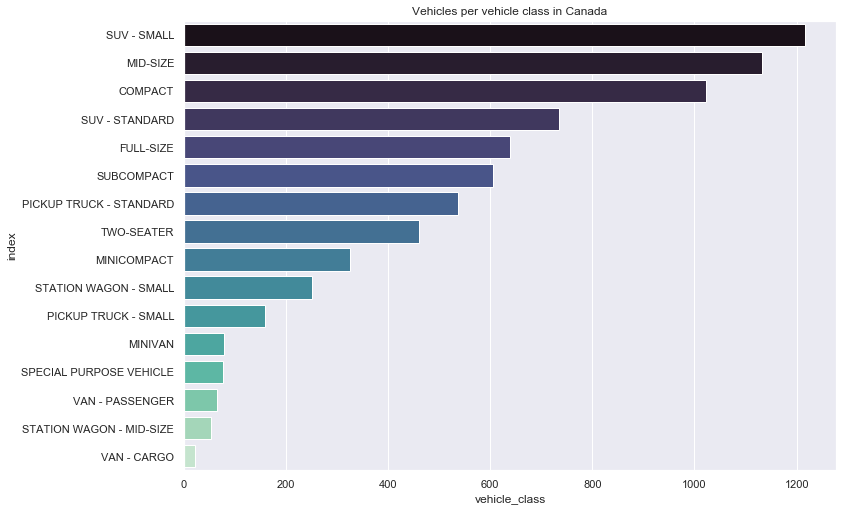

In [77]:
#barchart for vehicle per vehicle class in canada
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Vehicles per vehicle class in Canada")
sns.barplot(y="index", x = "vehicle_class", data = df.vehicle_class.value_counts().reset_index(), palette="mako")
plt.show()

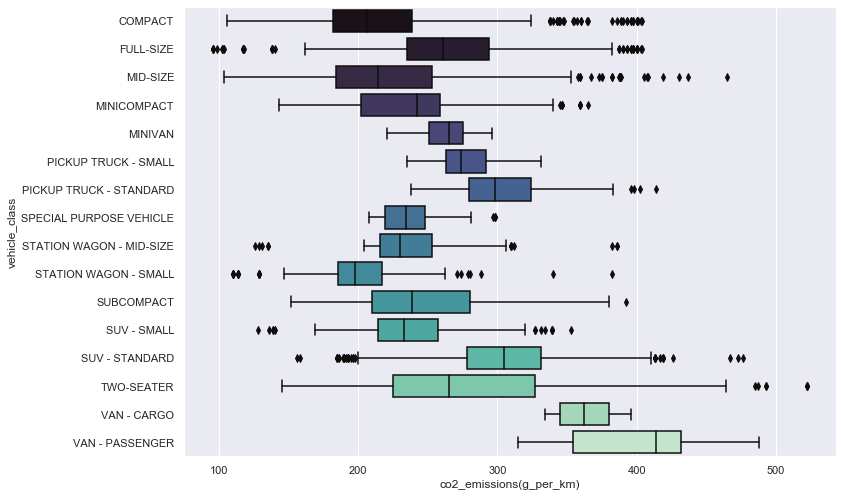

In [78]:
#graph for CO2 emmission per vehcile class in canade


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y="vehicle_class", x="co2_emissions(g_per_km)", data = df, palette="mako")
plt.show()

In [79]:
#Check
pd.DataFrame(df.query("vehicle_class == 'COMPACT'").groupby(['vehicle_class']).mean()['co2_emissions(g_per_km)'])

,co2_emissions(g_per_km)
vehicle_class,
COMPACT,216.679061


In [80]:
#Check
pd.DataFrame(df.query("vehicle_class == 'COMPACT'").groupby(['model']).mean()['co2_emissions(g_per_km)'])

,co2_emissions(g_per_km)
model,
200 CONVERTIBLE,239.000000
200 CONVERTIBLE FFV,236.000000
320i,200.500000
320i SEDAN,200.000000
320i xDRIVE,205.000000
320i xDRIVE SEDAN,200.000000
328d xDRIVE,184.250000
328d xDRIVE SEDAN,181.000000
328i,196.500000


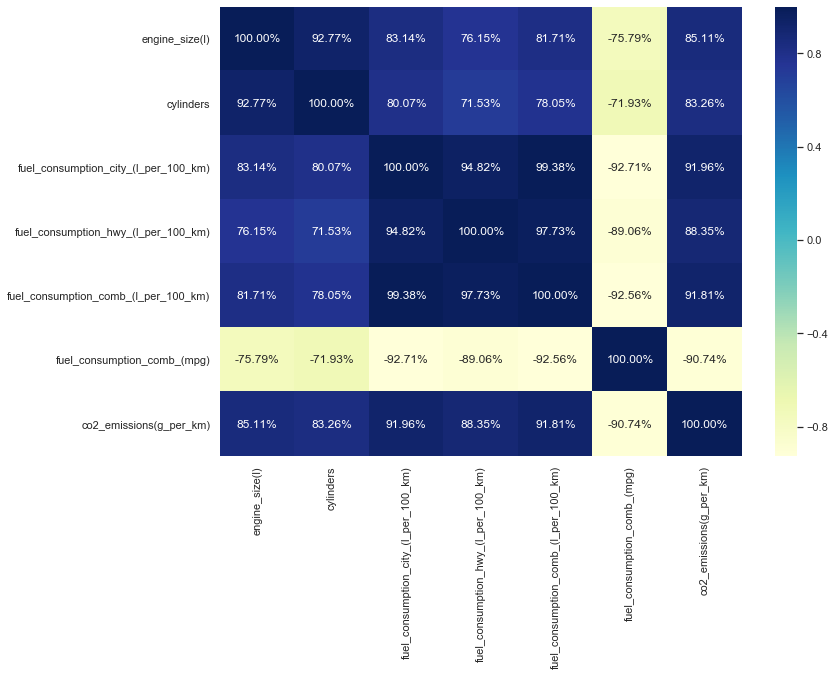

In [81]:
#heatmap graph
# fmt='.2%' for values in percentage
sns.heatmap(df.corr(), annot=True, fmt='.2%', cmap="YlGnBu");

## Analyze

## Can the CO2 emissions of the vehicle be predicted with the consumption information given when purchasing the vehicle?

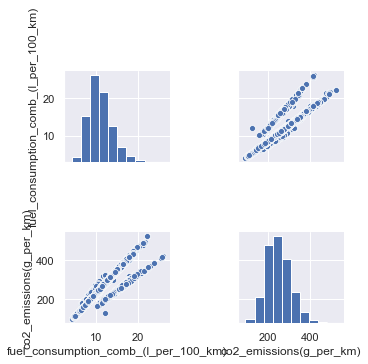

In [82]:
sns.pairplot(df[['fuel_consumption_comb_(l_per_100_km)', 'co2_emissions(g_per_km)']]);

In [83]:
df_pred = df
df_pred.head()


,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,HONDA,CIVIC COUPE,COMPACT,2.0,4,AV,X,7.8,5.8,6.9,41,162
2,HONDA,CIVIC COUPE,COMPACT,1.5,4,AV,X,7.5,5.6,6.7,42,155
3,FORD,FOCUS FFV,COMPACT,2.0,4,M5,E,12.3,8.9,10.8,26,179
4,FORD,FOCUS FFV,COMPACT,2.0,4,M5,X,9.2,6.6,8.0,35,188


In [84]:
df_pred.describe()

,engine_size(l),cylinders,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Model

In [96]:
#Model with scikit-learn based on all quantitative variables

#Split into explanatory and response variables
X = fill_df[['engine_size(l)', 'cylinders', 'fuel_consumption_city_(l_per_100_km)', 'fuel_consumption_hwy_(l_per_100_km)', 
             'fuel_consumption_comb_(l_per_100_km)']]
y = fill_df['co2_emissions(g_per_km)']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

#Instantiate model
lm_model_2 = LinearRegression(normalize=True)

#Fit model
lm_model_2.fit(X_train, y_train)
       
#Predict and score the model
y_test_preds = lm_model_2.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for our CO2 prediction model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for our CO2 prediction model was 0.8766423457946777 on 2216 values.'

In [97]:
#Check of output
#test_size = .10: 'The r-squared score for our CO2 prediction model was 0.8941782025170925 on 739 values.'
#test_size = .20: 'The r-squared score for our CO2 prediction model was 0.8767957231824948 on 1477 values.'
#test_size = .30: 'The r-squared score for our CO2 prediction model was 0.8766423457946777 on 2216 values.'
#test_size = .40: 'The r-squared score for our CO2 prediction model was 0.8747607963342674 on 2954 values.'
#test_size = .50: 'The r-squared score for our CO2 prediction model was 0.8799093697501833 on 3693 values.'

In [98]:
#Modelling with sklearn based only on fuel consumption

#Split into explanatory and response variables
X = fill_df[['fuel_consumption_city_(l_per_100_km)', 'fuel_consumption_hwy_(l_per_100_km)', 
             'fuel_consumption_comb_(l_per_100_km)']]
y = fill_df['co2_emissions(g_per_km)']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

#Instantiate model
lm_model_2 = LinearRegression(normalize=True)

#Fit model
lm_model_2.fit(X_train, y_train)
       
#Predict and score the model
y_test_preds = lm_model_2.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for our CO2 prediction model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for our CO2 prediction model was 0.8372542961100291 on 2216 values.'

## Analyze part 2

## Can we compare the actual emission of the vehicle in regards to the manufacturer's information and set them in relation to the CO2 targets?

In [99]:
df.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,HONDA,CIVIC COUPE,COMPACT,2.0,4,AV,X,7.8,5.8,6.9,41,162
2,HONDA,CIVIC COUPE,COMPACT,1.5,4,AV,X,7.5,5.6,6.7,42,155
3,FORD,FOCUS FFV,COMPACT,2.0,4,M5,E,12.3,8.9,10.8,26,179
4,FORD,FOCUS FFV,COMPACT,2.0,4,M5,X,9.2,6.6,8.0,35,188


In [100]:
df_ger.head()

,Hersteller,Modell,Modell Details,Preis ab [€],Preis Leasing ab pro Monat [€],Kraftstoffverbrauch komb. Max [l/100km],Kraftstoffverbrauch komb. Min [l/100km],CO2 Emission kombiniert Max [g/km],CO2 Emission kombiniert Min [g/km],CO2 Messverfahren,Source,Date
0,AUDI,A1,Sportback,20550.0,163.0,5.0,4.6,115,106,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
1,AUDI,A1,Citycarver,22350.0,189.0,5.2,4.9,119,112,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
2,AUDI,A3,Sportback,26800.0,213.0,5.4,3.9,131,99,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
3,AUDI,A3,Limousine,27700.0,227.0,5.4,3.8,128,97,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
4,AUDI,S3,Sportback,47500.0,376.0,7.4,7.4,170,169,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21


In [101]:
#provide the number of rows and columns in the canadian dataset

num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print(num_rows)
print(num_cols)

7385
12


In [102]:
#provide the number of rows and columns in the german dataset

num_rows = df_ger.shape[0] #Provide the number of rows in the dataset
num_cols = df_ger.shape[1] #Provide the number of columns in the dataset

print(num_rows)
print(num_cols)

59
12


In [103]:
list(df)

['make',
 'model',
 'vehicle_class',
 'engine_size(l)',
 'cylinders',
 'transmission',
 'fuel_type',
 'fuel_consumption_city_(l_per_100_km)',
 'fuel_consumption_hwy_(l_per_100_km)',
 'fuel_consumption_comb_(l_per_100_km)',
 'fuel_consumption_comb_(mpg)',
 'co2_emissions(g_per_km)']

In [104]:
list(df_ger)

['Hersteller',
 'Modell',
 'Modell Details ',
 'Preis ab [€]',
 'Preis Leasing ab pro Monat [€]',
 'Kraftstoffverbrauch komb. Max [l/100km]',
 'Kraftstoffverbrauch komb. Min [l/100km]',
 'CO2 Emission kombiniert Max [g/km]',
 'CO2 Emission kombiniert Min [g/km]',
 'CO2 Messverfahren',
 'Source ',
 'Date']

In [105]:
#standardize column titles in german data set
def clean_title_ger(title):
    return title.strip().lower().replace("/", "_per_").replace(" ", "_").replace("[", "(").replace("]", ")")

df_ger.rename(columns = clean_title_ger, inplace = True)

In [106]:
list(df_ger)

['hersteller',
 'modell',
 'modell_details',
 'preis_ab_(€)',
 'preis_leasing_ab_pro_monat_(€)',
 'kraftstoffverbrauch_komb._max_(l_per_100km)',
 'kraftstoffverbrauch_komb._min_(l_per_100km)',
 'co2_emission_kombiniert_max_(g_per_km)',
 'co2_emission_kombiniert_min_(g_per_km)',
 'co2_messverfahren',
 'source',
 'date']

In [113]:
make_can = df.groupby(['make']).mean()['co2_emissions(g_per_km)'].sort_values().dropna()
make_can

make
SMART            151.428571
HONDA            190.219626
FIAT             192.246575
MAZDA            193.672222
MINI             196.588235
SCION            200.454545
MITSUBISHI       200.505263
HYUNDAI          208.871429
VOLKSWAGEN       209.335025
KIA              214.294372
SUBARU           217.614286
ACURA            223.652778
TOYOTA           224.424242
ALFA ROMEO       224.900000
VOLVO            230.056452
BUICK            233.058252
NISSAN           236.864865
LEXUS            241.112360
CHRYSLER         246.170455
JEEP             250.342629
AUDI             250.846154
BMW              254.007590
INFINITI         254.064815
PORSCHE          258.941489
FORD             260.988854
CHEVROLET        264.346939
CADILLAC         265.854430
LINCOLN          267.302083
JAGUAR           267.987500
DODGE            276.361789
MERCEDES-BENZ    277.386635
GENESIS          284.840000
LAND ROVER       287.647059
RAM              292.402062
GMC              299.917683
MASERATI       

### Prepare Audi data from Canada

In [119]:
pd.DataFrame(df.query("make == 'AUDI'").groupby(['model']).mean()['co2_emissions(g_per_km)'])

,co2_emissions(g_per_km)
model,
A3,191.666667
A3 CABRIOLET QUATTRO,214.750000
A3 Cabriolet quattro,222.500000
A3 QUATTRO,202.250000
A3 TDI (modified),177.000000
A3 quattro,224.500000
A4,195.600000
A4 ALLROAD QUATTRO,223.500000
A4 QUATTRO,212.800000


In [126]:
pd.DataFrame(df.query("make == 'AUDI' and (model == 'A3')").groupby(['make', 'model']).mean()['co2_emissions(g_per_km)'])

,,co2_emissions(g_per_km)
make,model,
AUDI,A3,191.666667


In [132]:
audi_ger = df_ger.groupby(['modell']).mean()['co2_emission_kombiniert_max_(g_per_km)'].sort_values().dropna()
audi_ger

modell
A1       117.000000
Q2       128.000000
A3       129.500000
TT       153.666667
A4       166.000000
A5       166.333333
S3       168.000000
S4       168.500000
S6       169.000000
S7       170.000000
Q3       172.000000
TTS      174.000000
S5       175.000000
SQ2      176.000000
A7       176.000000
A6       176.333333
Q5       181.500000
SQ5      185.500000
TT RS    197.000000
Q8       204.000000
Q7       205.000000
RS Q3    205.500000
RS5      208.500000
RS4      211.000000
S8       246.000000
A8       247.500000
RS7      265.000000
RS6      265.000000
SQ8      276.000000
SQ7      278.000000
RS Q8    281.000000
R8       304.833333
Name: co2_emission_kombiniert_max_(g_per_km), dtype: float64

In [133]:
#audi_ger_2 = df_ger.groupby("modell").agg({
#    'co2_emission_kombiniert_max_(g_per_km)':["mean","median"]})
#audi_ger_2

In [134]:
#create new dataframe with only Audi data
df_audi_can = df[(df['make'] == 'AUDI')]
df_audi_can.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
72,AUDI,S4 QUATTRO,COMPACT,3.0,6,M6,Z,13.8,9.0,11.7,24,273
73,AUDI,S4 QUATTRO,COMPACT,3.0,6,AM7,Z,13.0,8.5,11.0,26,257
74,AUDI,Q3 QUATTRO,COMPACT,2.0,4,AS6,Z,11.9,8.4,10.3,27,240
75,AUDI,Q3,COMPACT,2.0,4,AS6,Z,12.0,8.2,10.3,27,242
76,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.6,7.3,9.1,31,214


In [135]:
#shows a list of all columns in the canadian dataset

list(df_audi_can)

['make',
 'model',
 'vehicle_class',
 'engine_size(l)',
 'cylinders',
 'transmission',
 'fuel_type',
 'fuel_consumption_city_(l_per_100_km)',
 'fuel_consumption_hwy_(l_per_100_km)',
 'fuel_consumption_comb_(l_per_100_km)',
 'fuel_consumption_comb_(mpg)',
 'co2_emissions(g_per_km)']

In [136]:
#describtion of the canadian dataset only for make==audi
df_audi_can.describe()

,engine_size(l),cylinders,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2.865035,5.692308,12.431818,8.588811,10.701399,27.206294,250.846154
std,0.983674,1.872163,2.634082,1.376653,2.035664,4.597798,45.633215
min,1.800000,4.000000,7.600000,5.500000,6.500000,16.000000,177.000000
25%,2.000000,4.000000,10.400000,7.800000,9.200000,25.000000,217.000000
50%,3.000000,6.000000,11.900000,8.300000,10.300000,27.000000,241.000000
75%,3.000000,6.000000,13.375000,9.175000,11.500000,31.000000,268.750000
max,6.300000,12.000000,21.200000,13.800000,17.800000,43.000000,409.000000


In [137]:
#save dataframe of audi canada data to *.csv file

df_audi_can.to_csv('df_audi_can.csv')

In [138]:
#import csv data from canada only for audi

df_audi_can_short = pd.read_csv('df_audi_can.csv')
df_audi_can_short.head()

,Unnamed: 0,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,72,AUDI,S4 QUATTRO,COMPACT,3.0,6,M6,Z,13.8,9.0,11.7,24,273
1,73,AUDI,S4 QUATTRO,COMPACT,3.0,6,AM7,Z,13.0,8.5,11.0,26,257
2,74,AUDI,Q3 QUATTRO,COMPACT,2.0,4,AS6,Z,11.9,8.4,10.3,27,240
3,75,AUDI,Q3,COMPACT,2.0,4,AS6,Z,12.0,8.2,10.3,27,242
4,76,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.6,7.3,9.1,31,214


In [140]:
#split model in model and model details

df_audi_can_short['model'] = df_audi_can_short['model'].str.split(' ').str[0]
df_audi_can_short.head()

,Unnamed: 0,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,72,AUDI,S4,COMPACT,3.0,6,M6,Z,13.8,9.0,11.7,24,273
1,73,AUDI,S4,COMPACT,3.0,6,AM7,Z,13.0,8.5,11.0,26,257
2,74,AUDI,Q3,COMPACT,2.0,4,AS6,Z,11.9,8.4,10.3,27,240
3,75,AUDI,Q3,COMPACT,2.0,4,AS6,Z,12.0,8.2,10.3,27,242
4,76,AUDI,A4,COMPACT,2.0,4,M6,Z,10.6,7.3,9.1,31,214


In [ ]:
#drop not needed columns for now

#https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
#df_short.drop(columns=['Vehicle Class','Engine Size(L)','Cylinders','Transmission','Fuel Type'])

In [141]:
pd.DataFrame(df_audi_can_short.query("make == 'AUDI'").groupby(['model']).mean()['co2_emissions(g_per_km)'])

,co2_emissions(g_per_km)
model,
A3,204.684211
A4,208.875000
A5,213.863636
A6,227.941176
A7,231.700000
A8,247.000000
A8L,278.133333
ALLROAD,242.000000
Q3,241.200000


In [142]:
#delete Modells with name "ALLROAD"
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
del_rows = df_audi_can_short[ (df_audi_can_short['model'] == 'ALLROAD') ].index
df_audi_can_short.drop(del_rows , inplace=True)

In [143]:
#Check
pd.DataFrame(df_audi_can_short.query("make == 'AUDI'").groupby(['model']).mean()['co2_emissions(g_per_km)'])

,co2_emissions(g_per_km)
model,
A3,204.684211
A4,208.875000
A5,213.863636
A6,227.941176
A7,231.700000
A8,247.000000
A8L,278.133333
Q3,241.200000
Q5,238.941176


In [144]:
#generate dataframe for AUDI canada CO2 data
df_a_can = pd.DataFrame(df_audi_can_short.query("make == 'AUDI'").groupby(['model']).mean()['co2_emissions(g_per_km)'])

In [145]:
#Check
df_a_can

,co2_emissions(g_per_km)
model,
A3,204.684211
A4,208.875000
A5,213.863636
A6,227.941176
A7,231.700000
A8,247.000000
A8L,278.133333
Q3,241.200000
Q5,238.941176


### Prepare Audi data from Germany

In [147]:
df_ger.head()

,hersteller,modell,modell_details,preis_ab_(€),preis_leasing_ab_pro_monat_(€),kraftstoffverbrauch_komb._max_(l_per_100km),kraftstoffverbrauch_komb._min_(l_per_100km),co2_emission_kombiniert_max_(g_per_km),co2_emission_kombiniert_min_(g_per_km),co2_messverfahren,source,date
0,AUDI,A1,Sportback,20550.0,163.0,5.0,4.6,115,106,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
1,AUDI,A1,Citycarver,22350.0,189.0,5.2,4.9,119,112,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
2,AUDI,A3,Sportback,26800.0,213.0,5.4,3.9,131,99,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
3,AUDI,A3,Limousine,27700.0,227.0,5.4,3.8,128,97,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21
4,AUDI,S3,Sportback,47500.0,376.0,7.4,7.4,170,169,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21


In [150]:
#generate average CO2 value for german CO2 data
df_ger['co2_emission_kombiniert_avg_(g_per_km)'] = df_ger[['co2_emission_kombiniert_min_(g_per_km)','co2_emission_kombiniert_max_(g_per_km)']].mean(axis=1)

In [151]:
#Check
df_ger

,hersteller,modell,modell_details,preis_ab_(€),preis_leasing_ab_pro_monat_(€),kraftstoffverbrauch_komb._max_(l_per_100km),kraftstoffverbrauch_komb._min_(l_per_100km),co2_emission_kombiniert_max_(g_per_km),co2_emission_kombiniert_min_(g_per_km),co2_messverfahren,source,date,co2_emission_kombiniert_avg_(g_per_km)
0,AUDI,A1,Sportback,20550.0,163.0,5.0,4.6,115,106,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,110.5
1,AUDI,A1,Citycarver,22350.0,189.0,5.2,4.9,119,112,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,115.5
2,AUDI,A3,Sportback,26800.0,213.0,5.4,3.9,131,99,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,115.0
3,AUDI,A3,Limousine,27700.0,227.0,5.4,3.8,128,97,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,112.5
4,AUDI,S3,Sportback,47500.0,376.0,7.4,7.4,170,169,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,169.5
5,AUDI,S3,Limousine,48400.0,384.0,7.3,7.2,166,165,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,165.5
6,AUDI,A4,Limousine,34100.0,272.0,7.1,4.0,163,104,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,133.5
7,AUDI,A4,Avant,35750.0,276.0,7.2,4.0,167,106,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,136.5
8,AUDI,A4,allroad quattro,49600.0,402.0,7.3,4.8,168,126,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,147.0
9,AUDI,S4,Limousine TDI,63100.0,574.0,6.3,6.3,167,167,NEFZ,https://www.audi.de/de/brand/de/neuwagen.html,2021-01-21,167.0


In [152]:
#generate dataframe for AUDI germany CO2 data
df_a_ger = pd.DataFrame(df_ger.query("hersteller == 'AUDI'").groupby(['modell']).mean()['co2_emission_kombiniert_avg_(g_per_km)'])

In [153]:
#Check
df_a_ger

,co2_emission_kombiniert_avg_(g_per_km)
modell,
A1,113.000000
A3,113.750000
A4,139.000000
A5,136.666667
A6,148.833333
A7,146.500000
A8,209.000000
Q2,117.500000
Q3,145.250000


## Analyze part 3

### Assessment of data from Canada and Germany

In [154]:
#Help: https://datatofish.com/compare-values-dataframes/
#Copy CO2 data from Canada in df from Germany 
df_a_ger['co2_emissions(g_per_km)'] = df_a_can['co2_emissions(g_per_km)']

In [155]:
#Check
df_a_ger

,co2_emission_kombiniert_avg_(g_per_km),co2_emissions(g_per_km)
modell,,
A1,113.000000,NaN
A3,113.750000,204.684211
A4,139.000000,208.875000
A5,136.666667,213.863636
A6,148.833333,227.941176
A7,146.500000,231.700000
A8,209.000000,247.000000
Q2,117.500000,NaN
Q3,145.250000,241.200000


In [158]:
#Add delta column to show delta between sales info (GER) and actual values (CAN)
df_a_ger['Delta'] = df_a_can['co2_emissions(g_per_km)'] - df_a_ger['co2_emission_kombiniert_avg_(g_per_km)']

In [159]:
#Check
df_a_ger

,co2_emission_kombiniert_avg_(g_per_km),co2_emissions(g_per_km),Delta
modell,,,
A1,113.000000,NaN,NaN
A3,113.750000,204.684211,90.934211
A4,139.000000,208.875000,69.875000
A5,136.666667,213.863636,77.196970
A6,148.833333,227.941176,79.107843
A7,146.500000,231.700000,85.200000
A8,209.000000,247.000000,38.000000
Q2,117.500000,NaN,NaN
Q3,145.250000,241.200000,95.950000


In [160]:
# Drop any row with a missing value
df_overview  = df_a_ger.dropna()

In [161]:
#Check
df_overview

,co2_emission_kombiniert_avg_(g_per_km),co2_emissions(g_per_km),Delta
modell,,,
A3,113.750000,204.684211,90.934211
A4,139.000000,208.875000,69.875000
A5,136.666667,213.863636,77.196970
A6,148.833333,227.941176,79.107843
A7,146.500000,231.700000,85.200000
A8,209.000000,247.000000,38.000000
Q3,145.250000,241.200000,95.950000
Q5,156.500000,238.941176,82.441176
Q7,193.000000,275.909091,82.909091


In [164]:
#Rename columns
df_overview.columns = ['CO2_Info_Sales_GER_(g_per_km)', 'CO2_Info_Actual_CAN_(g_per_km)','Delta_(g_per_km)']

## Final overview 

In [165]:
#Check
df_overview

,CO2_Info_Sales_GER_(g_per_km),CO2_Info_Actual_CAN_(g_per_km),Delta_(g_per_km)
modell,,,
A3,113.750000,204.684211,90.934211
A4,139.000000,208.875000,69.875000
A5,136.666667,213.863636,77.196970
A6,148.833333,227.941176,79.107843
A7,146.500000,231.700000,85.200000
A8,209.000000,247.000000,38.000000
Q3,145.250000,241.200000,95.950000
Q5,156.500000,238.941176,82.441176
Q7,193.000000,275.909091,82.909091


In [ ]:
#Other info: 

#sns.heatmap(df_ger.corr(), annot=True, fmt='.2%', cmap="YlGnBu");

In [ ]:
#Links:

# Data Source | https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6
# Fuel consumption testing | https://www.nrcan.gc.ca/energy-efficiency/energy-efficiency-transportation/2020-fuel-consumption-guide/understanding-fuel-consumption-r/fuel-consumption-testing/21008
